In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'global-news-engagement-on-social-media:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4602254%2F7848496%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240322%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240322T111305Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D39d92cde1acf0cbc988d5ac73ecbca9b5bd7bed359bba52cf34f2f05d9f9a33820f35876b8fd6fdded1520c438b6e277056c6ffc09d9cd2d1412a28ff975ba97531c7e0ee94ef9f475c0602a208fd49adb5688a9eba0ca5b0a23062d49e66e6ce7370b8f22d82c15b9cb3ffcc4a873e2bd6b1ad41ab8b5dfb858bd8c48db54bacd9694a59d4cd14ead5e90059e36188f3d826111a8aa1d9c256e3e3f64410d0fb7fddb0719a047c2f0a81d4771b8948cc7046d03a6e0732425dd46d08589b5674d9a4e0035f9947188ba06e4f48211d5fa032013708bf38884af6326d749aebfc3137166ace5cf90842e4342a0f63e26eefc061925e68c805f9dbeace41e5f5c'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 267156 bytes downloaded
Downloaded and uncompressed: global-news-engagement-on-social-media
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/global-news-engagement-on-social-media'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-news-engagement-on-social-media/bbc.csv
/kaggle/input/global-news-engagement-on-social-media/reuters.csv
/kaggle/input/global-news-engagement-on-social-media/cnn.csv
/kaggle/input/global-news-engagement-on-social-media/al_jazeera.csv


In [3]:
cnn_df = pd.read_csv('/kaggle/input/global-news-engagement-on-social-media/cnn.csv')
bbc_df = pd.read_csv('/kaggle/input/global-news-engagement-on-social-media/bbc.csv')
jazeera_df = pd.read_csv('/kaggle/input/global-news-engagement-on-social-media/al_jazeera.csv')
reuters_df = pd.read_csv('/kaggle/input/global-news-engagement-on-social-media/reuters.csv')

In [4]:
cnn_df.head()

,text,likes,comments,shares
0,Measles cases are increasing in the United Sta...,17,34,1
1,"At the turn of the millennium, web-based techn...",192,81,28
2,SpaceX launched the world's most powerful rock...,233,122,68
3,Italy’s competition authority has fined TikTok...,131,144,17
4,"SpaceX's Starship, the most powerful rocket ev...",390,237,37


In [5]:
bbc_df.head()

,text,likes,comments,shares
0,Queen Camilla was given a miniature version of...,577,228,50
1,"The study found females of five ""menopausal"" w...",174,18,52
2,The Ivy League university is named after Elihu...,116,59,44
3,"When the law passed in 2019, it sparked mass p...",133,56,16
4,"Freedom Village is located inside Korea's DMZ,...",117,18,26


In [6]:
jazeera_df.head()

,text,likes,comments,shares
0,“Numbers dropped by around half after the eart...,303,15,5
1,This exclusive footage obtained by Al Jazeera ...,809,174,81
2,The disappearance of 6-year-old Joshlin Smith ...,236,75,33
3,Millions are still suffering the pandemic’s li...,87,11,11
4,Multan Sultans face Peshawar Zalmi in the Paki...,522,71,5


In [7]:
reuters_df.head()

,text,likes,comments,shares
0,Taiwan dispatched coast guard boats to join a ...,3,1,1
1,Croatia's historic city of Dubrovnik aims to l...,11,5,1
2,As Senegal holds a delayed election on March 2...,5,4,2
3,Exclusive: Citigroup is investigating workplac...,4,6,0
4,Research in the expanding field of space medic...,15,6,2


# Examining the cnn_df

In [8]:
cnn_df.shape

(753, 4)

In [9]:
cnn_df.columns

Index(['text', 'likes', 'comments', 'shares'], dtype='object')

In [10]:
cnn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      753 non-null    object
 1   likes     753 non-null    int64 
 2   comments  753 non-null    int64 
 3   shares    753 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 23.7+ KB


In [11]:
# Checking the duplicates
cnn_duplicate = cnn_df.duplicated(subset=['text'], keep=False)
cnn_df[cnn_duplicate]

,text,likes,comments,shares
175,Devastation in Gaza as Israel wages war on Ham...,166,409,18
233,Devastation in Gaza as Israel wages war on Ham...,296,522,47
254,"News agencies recall image of Catherine, Princ...",256,132,33
282,"News agencies recall image of Catherine, Princ...",3265,436,73
285,Stone tools unearthed in a quarry in Ukraine b...,468,230,70
462,Stone tools unearthed in a quarry in Ukraine b...,308,194,47


In [12]:
# checking null values
cnn_df.isnull().sum()

text        0
likes       0
comments    0
shares      0
dtype: int64

In [13]:
cnn_df.describe([0.25, 0.5, 0.75, 0.8, 0.9, 0.99])

,likes,comments,shares
count,753.000000,753.000000,753.000000
mean,741.370518,423.033201,79.596282
std,2253.284363,501.989812,143.765125
min,17.000000,32.000000,1.000000
25%,204.000000,140.000000,32.000000
50%,308.000000,255.000000,46.000000
75%,549.000000,495.000000,72.000000
80%,638.000000,596.200000,85.000000
90%,1126.400000,950.400000,136.800000
99%,9247.480000,2346.720000,1001.920000


### Wrangling Code

In [14]:
# Removing duplicates
cnn_df = cnn_df.drop_duplicates(subset=['text']).reset_index(drop=True)

# Removing outliers
cnn_df = cnn_df[cnn_df['likes']<=cnn_df['likes'].quantile(0.8)].reset_index(drop=True)

In [15]:
cnn_df.shape

(602, 4)

# Examining the bbc_df

In [16]:
bbc_df.shape

(1000, 4)

In [17]:
bbc_df.columns

Index(['text', 'likes', 'comments', 'shares'], dtype='object')

In [18]:
bbc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      1000 non-null   object
 1   likes     1000 non-null   int64 
 2   comments  1000 non-null   int64 
 3   shares    1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [19]:
# Checking the duplicates
bbc_duplicate = bbc_df.duplicated(subset=['text'], keep=False)
bbc_df[bbc_duplicate]

,text,likes,comments,shares
605,"Inspectors found the toilet facilities ""in a p...",437,197,32
621,"Inspectors found the toilet facilities ""in a p...",245,104,9


In [20]:
# checking null values
bbc_df.isnull().sum()

text        0
likes       0
comments    0
shares      0
dtype: int64

In [21]:
bbc_df.describe([0.25, 0.5, 0.75, 0.8, 0.9, 0.99])

,likes,comments,shares
count,1000.000000,1000.000000,1000.000000
mean,805.666000,246.535000,67.735000
std,1675.747187,286.764026,120.955202
min,116.000000,0.000000,9.000000
25%,305.750000,83.000000,28.000000
50%,453.000000,158.000000,42.000000
75%,729.000000,298.000000,64.250000
80%,855.200000,357.000000,74.200000
90%,1330.700000,541.800000,108.100000
99%,6422.000000,1304.070000,579.070000


### Wrangling Code

In [22]:
# Removing duplicates
bbc_df = bbc_df.drop_duplicates(subset=['text']).reset_index(drop=True)

# Removing outliers
bbc_df = bbc_df[bbc_df['likes']<=bbc_df['likes'].quantile(0.8)].reset_index(drop=True)

In [23]:
bbc_df.shape

(799, 4)

# Examining the jazeera_df

In [24]:
jazeera_df.shape

(1000, 4)

In [25]:
jazeera_df.columns

Index(['text', 'likes', 'comments', 'shares'], dtype='object')

In [26]:
jazeera_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      981 non-null    object
 1   likes     1000 non-null   int64 
 2   comments  1000 non-null   int64 
 3   shares    1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [27]:
# Checking duplicates
jazeera_duplicate = jazeera_df.duplicated(subset=['text'], keep = False)
jazeera_df[jazeera_duplicate]

,text,likes,comments,shares
48,NaN,556,284,32
101,NaN,302,137,30
166,NaN,409,154,15
307,NaN,463,196,101
345,NaN,870,49,10
349,NaN,374,241,49
415,NaN,414,101,115
416,NaN,169,89,13
470,NaN,461,239,124
483,NaN,224,53,15


In [28]:
# checking null values
jazeera_df.isnull().sum()

text        19
likes        0
comments     0
shares       0
dtype: int64

In [29]:
jazeera_df.describe([0.25, 0.50, 0.75, 0.80, 0.90, 0.99])

,likes,comments,shares
count,1000.00000,1000.000000,1000.000000
mean,722.09500,200.270000,101.968000
std,1322.98066,246.223136,220.166256
min,83.00000,1.000000,1.000000
25%,239.00000,56.000000,19.000000
50%,385.50000,134.000000,45.000000
75%,622.00000,249.250000,98.000000
80%,724.40000,280.000000,116.400000
90%,1286.30000,422.000000,217.300000
99%,6204.39000,1088.080000,993.170000


### Wrangling Code

In [30]:
# Removing Null values
jazeera_df = jazeera_df.dropna().reset_index(drop=True)

# Removing duplicates
jazeera_df = jazeera_df.drop_duplicates(subset=['text']).reset_index(drop=True)

# Removing outliers
jazeera_df = jazeera_df[jazeera_df['likes']<=jazeera_df['likes'].quantile(0.8)].reset_index(drop=True)

In [31]:
jazeera_df.shape

(783, 4)

# Examining reuters

In [32]:
reuters_df.shape

(1000, 4)

In [33]:
reuters_df.columns

Index(['text', 'likes', 'comments', 'shares'], dtype='object')

In [34]:
reuters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      1000 non-null   object
 1   likes     1000 non-null   int64 
 2   comments  1000 non-null   int64 
 3   shares    1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [35]:
# Checking duplicates
reuters_duplicates = reuters_df.duplicated(subset=['text'], keep=False)
reuters_df[reuters_duplicates]

,text,likes,comments,shares
29,A look at the day ahead in U.S. and global mar...,15,3,3
60,A look at the day ahead in European and global...,45,9,10
61,The Russian-controlled management of the Zapor...,94,27,12
71,The Russian-controlled management of the Zapor...,98,44,17
212,A look at the day ahead in U.S. and global mar...,9,7,3
533,Several leading news organisations have withdr...,41,21,5
551,An influx of artificial intelligence startups ...,42,4,6
552,A look at the day ahead in U.S. and global mar...,6,1,0
586,An influx of artificial intelligence startups ...,41,0,7
600,Hollywood's biggest stars gathered to celebrat...,238,77,7


In [36]:
# checking null values
reuters_df.isnull().sum()

text        0
likes       0
comments    0
shares      0
dtype: int64

In [37]:
reuters_df.describe([0.25,0.5,0.75,0.80,0.90,0.99])

,likes,comments,shares
count,1000.000000,1000.000000,1000.000000
mean,91.282000,24.592000,10.741000
std,190.385354,55.714968,24.943418
min,3.000000,0.000000,0.000000
25%,29.000000,4.000000,3.000000
50%,45.000000,8.000000,6.000000
75%,78.000000,19.000000,11.000000
80%,94.000000,24.000000,13.000000
90%,166.000000,56.000000,22.000000
99%,889.240000,289.050000,80.160000


### Wrangling Code

In [38]:
# Removing Duplicates
reuters_df = reuters_df.drop_duplicates(subset=['text']).reset_index(drop=True)

# Removing outliers
reuters_df = reuters_df[reuters_df['likes']<= reuters_df['likes'].quantile(0.8)].reset_index(drop=True)

In [39]:
reuters_df.shape

(794, 4)

Making a new Dataframe by combining the all Dataframe with a new column, where the values will be the channel names.

In [40]:
#add channel col
cnn_df['channel'] = 'CNN'
bbc_df['channel'] = 'BBC'
jazeera_df['channel'] = 'Al-Jazeera'
reuters_df['channel'] = 'Reuters'

#Combine df
combine_df = pd.concat([cnn_df, bbc_df, jazeera_df, reuters_df], ignore_index=True)

In [41]:
combine_df.shape

(2978, 5)

In [42]:
combine_df = combine_df[['channel', 'text', 'likes', 'comments', 'shares']]
combine_df.head()

,channel,text,likes,comments,shares
0,CNN,Measles cases are increasing in the United Sta...,17,34,1
1,CNN,"At the turn of the millennium, web-based techn...",192,81,28
2,CNN,SpaceX launched the world's most powerful rock...,233,122,68
3,CNN,Italy’s competition authority has fined TikTok...,131,144,17
4,CNN,"SpaceX's Starship, the most powerful rocket ev...",390,237,37


In [43]:
# IMPORTING THE VISUALIZATION LIBRARIES
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
#Melting the df
combine_df_melt = combine_df.melt(id_vars=['channel', 'text'], var_name = 'Engagement', value_name='count')
combine_df_melt

,channel,text,Engagement,count
0,CNN,Measles cases are increasing in the United Sta...,likes,17
1,CNN,"At the turn of the millennium, web-based techn...",likes,192
2,CNN,SpaceX launched the world's most powerful rock...,likes,233
3,CNN,Italy’s competition authority has fined TikTok...,likes,131
4,CNN,"SpaceX's Starship, the most powerful rocket ev...",likes,390
...,...,...,...,...
8929,Reuters,China's top legislators vowed to enact a slew ...,shares,7
8930,Reuters,As the US Congress struggles to pass legislati...,shares,7
8931,Reuters,President Joe Biden's State of the Union addre...,shares,4
8932,Reuters,Australia's Great Barrier Reef has been hit by...,shares,10


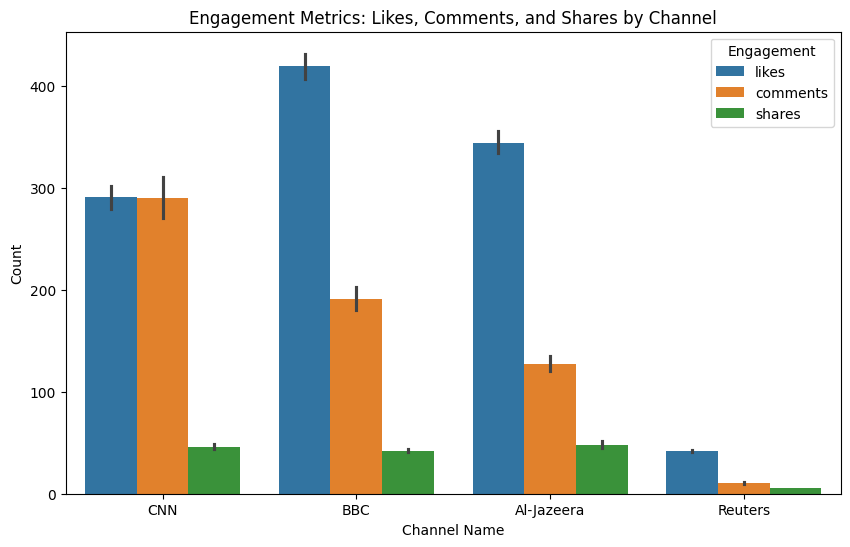

In [45]:
plt.figure(figsize=(10,6))
sns.barplot(data=combine_df_melt, x='channel', y='count', hue='Engagement')
plt.xlabel('Channel Name')
plt.ylabel('Count')
plt.title('Engagement Metrics: Likes, Comments, and Shares by Channel')
plt.show()

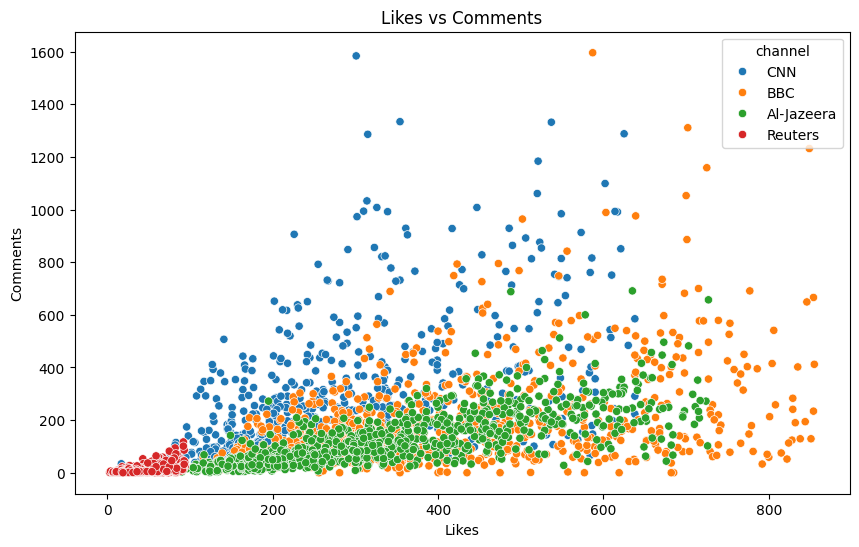

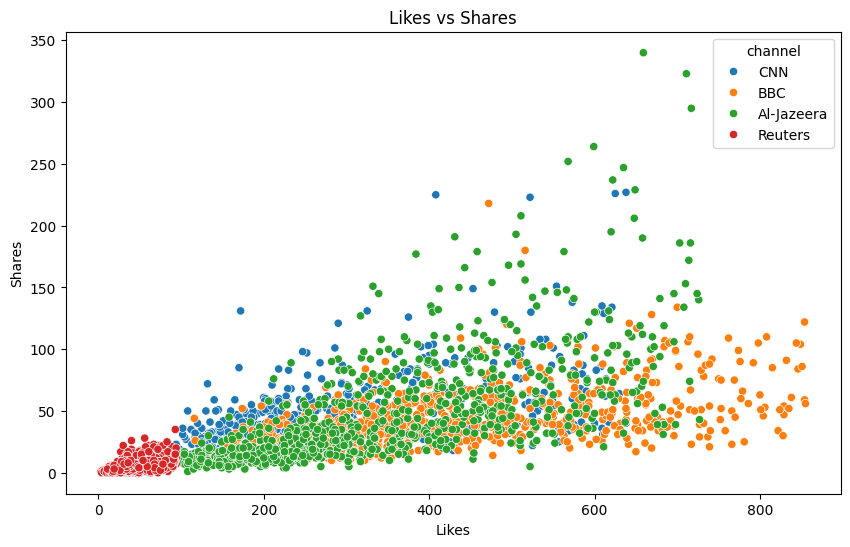

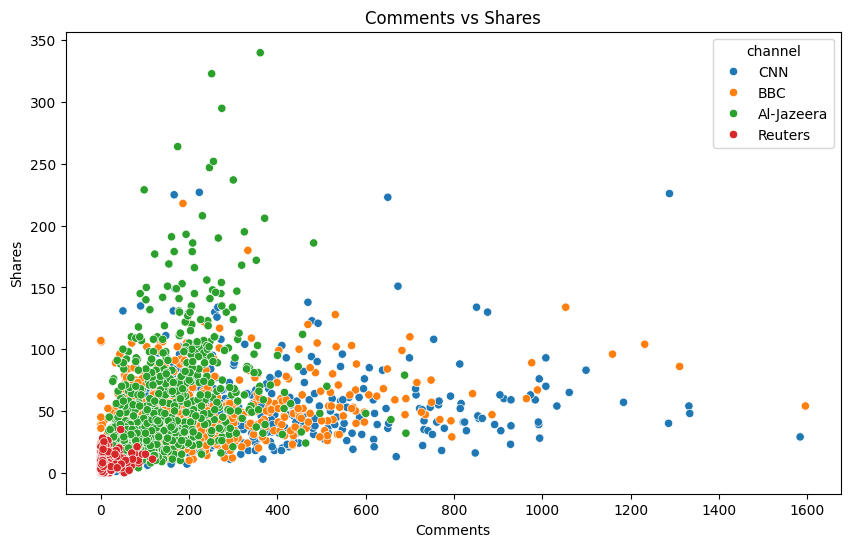

In [46]:
#Likes vs Comments
plt.figure(figsize = (10,6))
sns.scatterplot(data=combine_df, x='likes', y='comments', hue='channel')
plt.xlabel('Likes')
plt.ylabel('Comments')
plt.title('Likes vs Comments')
plt.show()

#Likes vs Shares
plt.figure(figsize = (10,6))
sns.scatterplot(data=combine_df, x='likes', y='shares', hue='channel')
plt.xlabel('Likes')
plt.ylabel('Shares')
plt.title('Likes vs Shares')
plt.show()

#Comments vs Shares
plt.figure(figsize = (10,6))
sns.scatterplot(data=combine_df, x='comments', y='shares', hue='channel')
plt.xlabel('Comments')
plt.ylabel('Shares')
plt.title('Comments vs Shares')
plt.show()

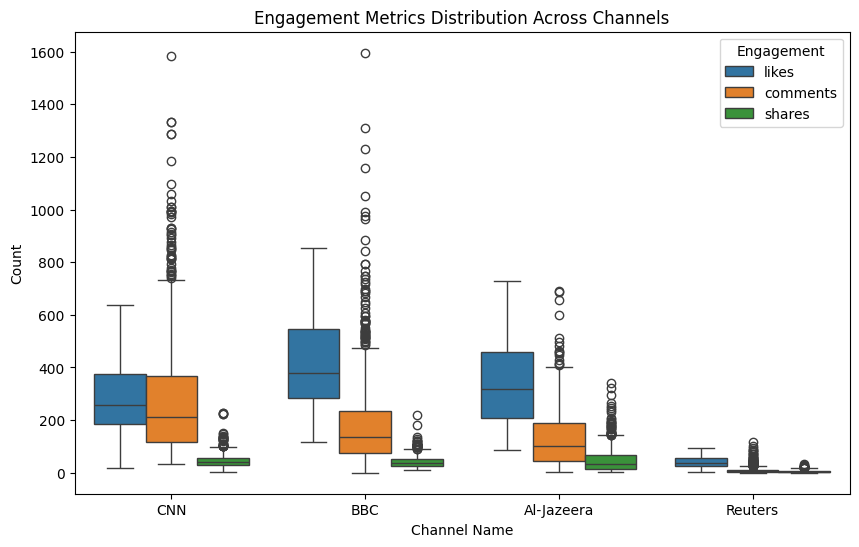

In [47]:
#Box plot
plt.figure(figsize=(10,6))
sns.boxplot(data=combine_df_melt, x='channel', y='count', hue='Engagement')
plt.xlabel('Channel Name')
plt.ylabel('Count')
plt.title('Engagement Metrics Distribution Across Channels')
plt.show()

### WordCloud

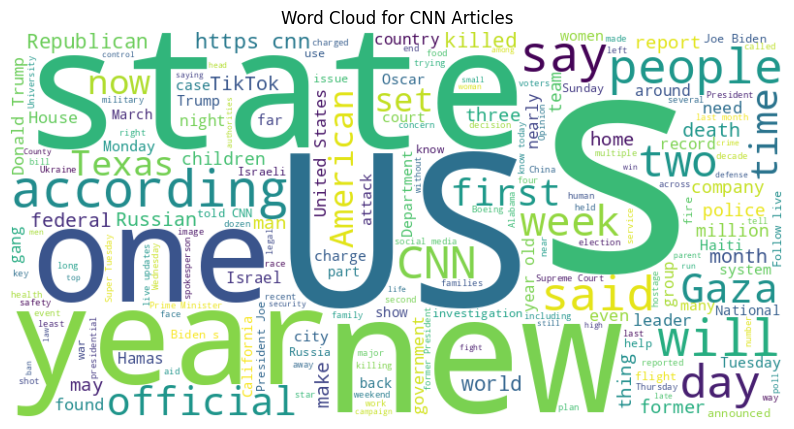

In [60]:
from wordcloud import WordCloud


articles_list = combine_df[combine_df['channel']=='CNN']['text']
articles_string = ' '.join(articles_list)

#Wordcloud
wordcloud = WordCloud(width=800, height=400, background_color = 'white').generate(articles_string)

#Display
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for CNN Articles')
plt.axis('off')
plt.show()





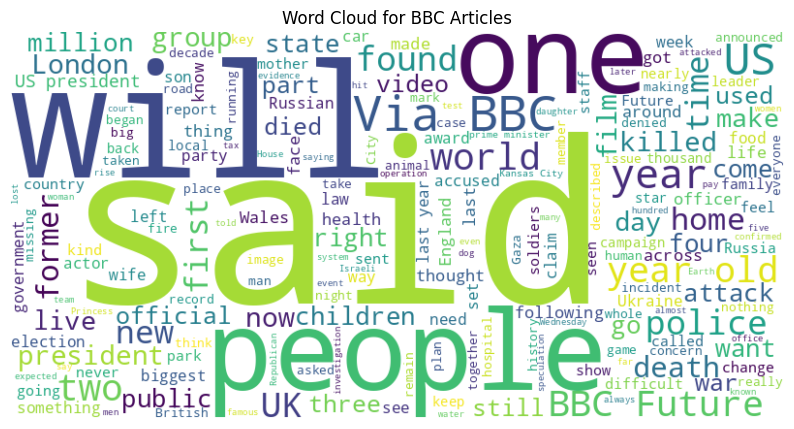

In [64]:
articles_list = combine_df[combine_df['channel']=='BBC']['text']
articles_string = ' '.join(articles_list)

#Wordcloud
wordcloud = WordCloud(width=800, height=400, background_color = 'white').generate(articles_string)

#Display
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for BBC Articles')
plt.axis('off')
plt.show()

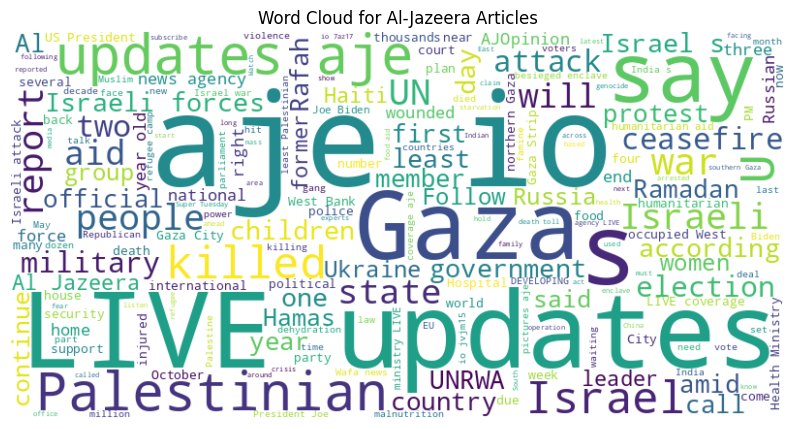

In [62]:
articles_list = combine_df[combine_df['channel']=='Al-Jazeera']['text']
articles_string = ' '.join(articles_list)

#Wordcloud
wordcloud = WordCloud(width=800, height=400, background_color = 'white').generate(articles_string)

#Display
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Al-Jazeera Articles')
plt.axis('off')
plt.show()

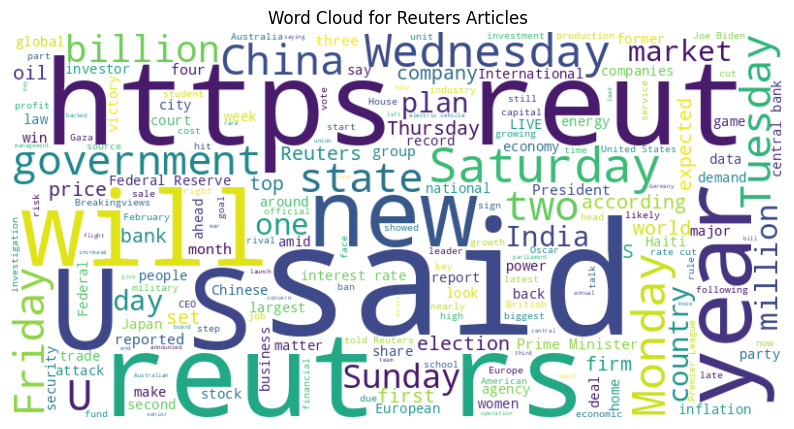

In [65]:
articles_list = combine_df[combine_df['channel']=='Reuters']['text']
articles_string = ' '.join(articles_list)

#Wordcloud
wordcloud = WordCloud(width=800, height=400, background_color = 'white').generate(articles_string)

#Display
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Reuters Articles')
plt.axis('off')
plt.show()

### Sentiment Analysis over time

In [72]:
from textblob import TextBlob

# Perform sentiment analysis for each article's text
sentiment_scores = []
for text in combine_df['text']:
    # Calculate sentiment polarity score
    blob = TextBlob(text)
    polarity_score = blob.sentiment.polarity
    sentiment_scores.append(polarity_score)

# Add sentiment scores to DataFrame
combine_df['sentiment_score'] = sentiment_scores


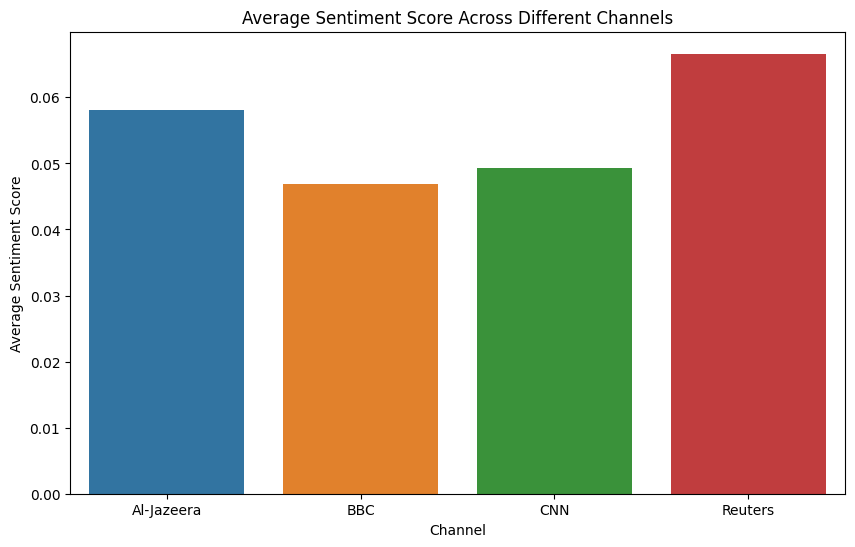

In [75]:
#Calculate avg of sentiment score
avg_group_sentiment = combine_df.groupby('channel')['sentiment_score'].mean().reset_index()

#Visualize
plt.figure(figsize=(10,6))
sns.barplot(data=avg_group_sentiment, x='channel', y='sentiment_score', hue='channel')
plt.title('Average Sentiment Score Across Different Channels')
plt.xlabel('Channel')
plt.ylabel('Average Sentiment Score')
plt.show()